# INF8225 Project - CNNs for image classification on CIFAR-10 and CIFAR-100 datasets

We are going to analyze and compare the performances of the 4 following CNNs :
- VGG-16
- EfficientNetV2_M
- EfficientNet-B0
- ResNet-50
- DenseNet121

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters

In [28]:
num_epochs = 5
batch_size = 32
learning_rate = 0.001
momentum = 0.9
weight_decay=5e-4

# Datasets

In [29]:
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize( 
       (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010) 
    )
])

## CIFAR-10

In [30]:
train_dataset_10 = torchvision.datasets.CIFAR10(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset_10 = torchvision.datasets.CIFAR10(
    root= './data', train = False,
    download =True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [31]:
len_train = int(len(train_dataset_10) * 0.9)
len_val = len(train_dataset_10) - len_train
train_subset, val_subset = random_split(train_dataset_10, [len_train, len_val])

In [32]:
train_loader_10 = torch.utils.data.DataLoader(train_subset
    , batch_size = batch_size
    , shuffle = True)
val_loader_10 = torch.utils.data.DataLoader(val_subset
    , batch_size = batch_size
    , shuffle = True)
test_loader_10 = torch.utils.data.DataLoader(test_dataset_10
    , batch_size = batch_size
    , shuffle = True)
n_total_step = len(train_loader_10)
print(n_total_step)

1407


In [33]:
print(len(val_loader_10))

157


## CIFAR-100

In [34]:
train_dataset_100 = torchvision.datasets.CIFAR100(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset_100 = torchvision.datasets.CIFAR100(
    root= './data', train = False,
    download =True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
len_train = int(len(train_dataset_100) * 0.9)
len_val = len(train_dataset_100) - len_train
train_subset, val_subset = random_split(train_dataset_100, [len_train, len_val])

In [36]:
train_loader_100 = torch.utils.data.DataLoader(train_subset
    , batch_size = batch_size
    , shuffle = True)
val_loader_100 = torch.utils.data.DataLoader(val_subset
    , batch_size = batch_size
    , shuffle = True)
test_loader_100 = torch.utils.data.DataLoader(test_dataset_100
    , batch_size = batch_size
    , shuffle = True)
n_total_step = len(train_loader_100)
print(n_total_step)

1407


# Load pre-trained models

## VGG-16

In [37]:
vgg16_10 = models.vgg16(pretrained = True)
input_lastLayer = vgg16_10.classifier[6].in_features
vgg16_10.classifier[6] = nn.Linear(input_lastLayer,10)
vgg16_10 = vgg16_10.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [38]:
# Last layer with 100 outputs (because CIFAR-100)
vgg16_100 = models.vgg16(pretrained = True)
input_lastLayer = vgg16_100.classifier[6].in_features
vgg16_100.classifier[6] = nn.Linear(input_lastLayer,100)
vgg16_100 = vgg16_100.to(device)

## EfficientNetV2_M

In [39]:
effnet_v2_10 = models.efficientnet_v2_m(pretrained = True)
input_lastLayer = effnet_v2_10.classifier[1].in_features
effnet_v2_10.classifier[1] = nn.Linear(input_lastLayer,10)
effnet_v2_10 = effnet_v2_10.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
# Last layer with 100 outputs (because CIFAR-100)
effnet_v2_100 = models.efficientnet_v2_m(pretrained = True)
input_lastLayer = effnet_v2_100.classifier[1].in_features
effnet_v2_100.classifier[1] = nn.Linear(input_lastLayer,100)
effnet_v2_100 = effnet_v2_100.to(device)

## EfficientNet-B0

In [41]:
effnet_10 = models.efficientnet_b0(pretrained = True)
input_lastLayer = effnet_10.classifier[1].in_features
effnet_10.classifier[1] = nn.Linear(input_lastLayer,10)
effnet_10 = effnet_10.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [42]:
# Last layer with 100 outputs (because CIFAR-100)
effnet_100 = models.efficientnet_b0(pretrained = True)
input_lastLayer = effnet_100.classifier[1].in_features
effnet_100.classifier[1] = nn.Linear(input_lastLayer,100)
effnet_100 = effnet_100.to(device)

## ResNet-50

In [43]:
res50_10 = models.resnet50(pretrained = True)
input_lastLayer = res50_10.fc.in_features
res50_10.fc = nn.Linear(input_lastLayer,10)
res50_10 = res50_10.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [44]:
# Last layer with 100 outputs (because CIFAR-100)
res50_100 = models.resnet50(pretrained = True)
input_lastLayer = res50_100.fc.in_features
res50_100.fc = nn.Linear(input_lastLayer,100)
res50_100 = res50_100.to(device)

## Densenet-121

In [45]:
dense121_10 = models.densenet121(pretrained = True)
input_lastLayer = dense121_10.classifier.in_features
dense121_10.classifier = nn.Linear(input_lastLayer,10)
dense121_10 = dense121_10.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [46]:
# Last layer with 100 outputs (because CIFAR-100)
dense121_100 = models.densenet121(pretrained = True)
input_lastLayer = dense121_100.classifier.in_features
dense121_100.classifier = nn.Linear(input_lastLayer,100)
dense121_100 = dense121_100.to(device)

# Train the models

In [47]:
criterion=nn.CrossEntropyLoss()

In [48]:
def train(model, train_dataloader, val_dataloader):
  losses_train = []
  accuracies_train = []
  losses_val = []
  accuracies_val = []

  best_model = model
  best_val_accuracy = 0.0

  n_total_step = len(train_dataloader)

  optimizer = torch.optim.SGD(model.parameters(), 
                              lr = learning_rate, 
                              momentum=momentum,
                              weight_decay=weight_decay
                              )

  for epoch in range(num_epochs):
    ######################## TRAINING #############################
    train_loss = 0.0
    train_total_preds = 0
    train_total_corrects = 0
    model.train()

    for i, (imgs , labels) in enumerate(train_dataloader):
      imgs = imgs.to(device)
      labels = labels.to(device)
      labels_hat = model(imgs)
      n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
      loss_value = criterion(labels_hat, labels)
      train_loss += loss_value.item()
      train_total_corrects += n_corrects
      train_total_preds += labels.size(0)
      loss_value.backward()
      optimizer.step()
      optimizer.zero_grad()
      if (i+1) % 250 == 0:
        print(f'epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: Training loss = {loss_value:.5f}, Training acc = {100*(n_corrects/labels.size(0)):.2f}%')
    print()

    ####################### VALIDATION ##############################
    val_loss = 0.0
    val_total_preds = 0
    val_total_corrects = 0
    model.eval()

    for imgs, labels in val_dataloader:
      imgs = imgs.to(device)
      labels = labels.to(device)
      labels_hat = model(imgs)
      n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
      loss_value = criterion(labels_hat, labels)
      val_loss += loss_value.item()
      val_total_corrects += n_corrects
      val_total_preds += labels.size(0)

    accuracy_train = 100*(train_total_corrects/train_total_preds)
    accuracy_val = 100*(val_total_corrects/val_total_preds)
    if accuracy_val > best_val_accuracy:
      best_val_accuracy = accuracy_val
      best_model = model

    print(f"Epoch {epoch+1:2d}, \
                Train: loss={(train_loss / len(train_dataloader)):.3f}, accuracy={accuracy_train:.1f}%, \
                Valid: loss={(val_loss / len(val_dataloader)):.3f}, accuracy={accuracy_val:.1f}%", flush=True)
    
    print()
    losses_train.append(train_loss / len(train_dataloader))
    losses_val.append(val_loss / len(val_dataloader))
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)

  return best_model, losses_train, losses_val, accuracies_train, accuracies_val

In [54]:
def plot_loss_and_accuracy(train_losses, val_losses, train_acc, val_acc):
  fig = plt.figure(figsize=(10,5))
  ax0 = fig.add_subplot(121, title="Training and Validation Loss")
  ax1 = fig.add_subplot(122, title="Training and Validation Accuracy")
  # plt.title("Training and Validation Loss")
  ax0.plot(val_losses,label="val")
  ax0.plot(train_losses,label="train")
  ax0.set_xlabel("Epoch")
  ax0.set_ylabel("Loss")
  ax0.legend()

  ax1.plot(val_acc,label="val")
  ax1.plot(train_acc,label="train")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Accuracy")
  ax1.legend()

  fig.show()

## VGG-16

### CIFAR-10

In [50]:
vgg16_10, train_loss, val_loss, train_acc, val_acc = train(vgg16_10, train_loader_10, val_loader_10)

epoch 1/5, step: 250/1407: Training loss = 0.28635, Training acc = 90.62%
epoch 1/5, step: 500/1407: Training loss = 0.49942, Training acc = 84.38%
epoch 1/5, step: 750/1407: Training loss = 0.45224, Training acc = 87.50%
epoch 1/5, step: 1000/1407: Training loss = 0.59582, Training acc = 78.12%
epoch 1/5, step: 1250/1407: Training loss = 0.31312, Training acc = 93.75%

Epoch  1,                 Train: loss=0.448, accuracy=84.7%,                 Valid: loss=0.277, accuracy=90.5%

epoch 2/5, step: 250/1407: Training loss = 0.20333, Training acc = 93.75%
epoch 2/5, step: 500/1407: Training loss = 0.17082, Training acc = 87.50%
epoch 2/5, step: 750/1407: Training loss = 0.19947, Training acc = 96.88%
epoch 2/5, step: 1000/1407: Training loss = 0.54872, Training acc = 90.62%
epoch 2/5, step: 1250/1407: Training loss = 0.13483, Training acc = 93.75%

Epoch  2,                 Train: loss=0.222, accuracy=92.5%,                 Valid: loss=0.246, accuracy=91.8%

epoch 3/5, step: 250/1407: Tra

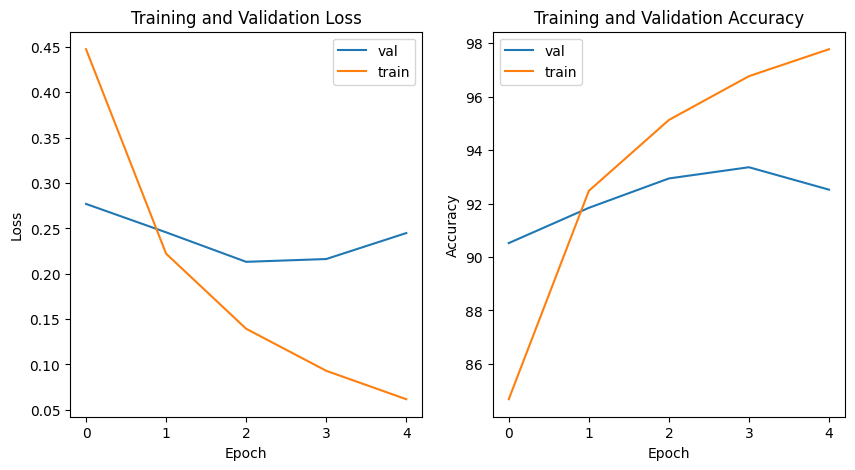

In [55]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

### CIFAR-100

In [56]:
vgg16_100, train_loss, val_loss, train_acc, val_acc = train(vgg16_100, train_loader_100, val_loader_100)

epoch 1/5, step: 250/1407: Training loss = 1.62481, Training acc = 59.38%
epoch 1/5, step: 500/1407: Training loss = 2.10142, Training acc = 40.62%
epoch 1/5, step: 750/1407: Training loss = 1.44763, Training acc = 62.50%
epoch 1/5, step: 1000/1407: Training loss = 1.50832, Training acc = 59.38%
epoch 1/5, step: 1250/1407: Training loss = 1.20071, Training acc = 68.75%

Epoch  1,                 Train: loss=1.802, accuracy=51.4%,                 Valid: loss=1.125, accuracy=67.8%

epoch 2/5, step: 250/1407: Training loss = 0.90757, Training acc = 75.00%
epoch 2/5, step: 500/1407: Training loss = 1.31725, Training acc = 59.38%
epoch 2/5, step: 750/1407: Training loss = 1.92015, Training acc = 53.12%
epoch 2/5, step: 1000/1407: Training loss = 1.18554, Training acc = 53.12%
epoch 2/5, step: 1250/1407: Training loss = 1.09763, Training acc = 78.12%

Epoch  2,                 Train: loss=1.051, accuracy=68.9%,                 Valid: loss=0.986, accuracy=70.6%

epoch 3/5, step: 250/1407: Tra

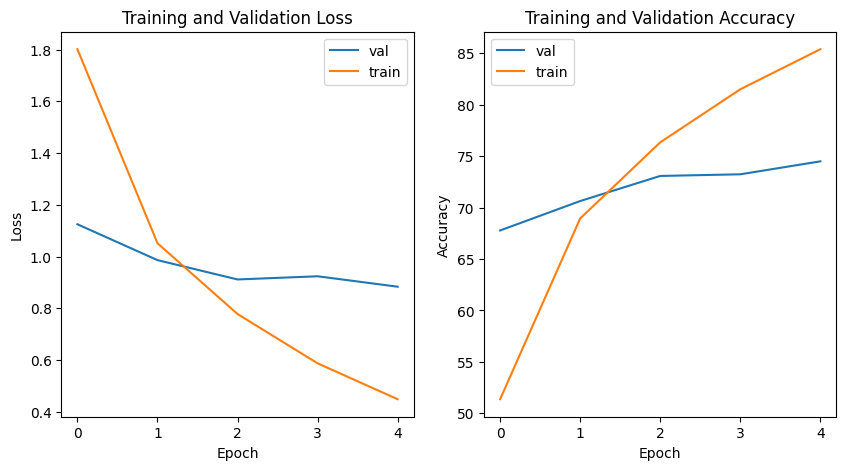

In [57]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

## EfficientNetV2_M

### CIFAR-10

In [58]:
effnet_v2_10, train_loss, val_loss, train_acc, val_acc = train(effnet_v2_10, train_loader_10, val_loader_10)

epoch 1/5, step: 250/1407: Training loss = 0.40199, Training acc = 90.62%
epoch 1/5, step: 500/1407: Training loss = 0.11319, Training acc = 96.88%
epoch 1/5, step: 750/1407: Training loss = 0.15037, Training acc = 90.62%
epoch 1/5, step: 1000/1407: Training loss = 0.02749, Training acc = 100.00%
epoch 1/5, step: 1250/1407: Training loss = 0.22619, Training acc = 90.62%

Epoch  1,                 Train: loss=0.326, accuracy=90.3%,                 Valid: loss=0.096, accuracy=96.9%

epoch 2/5, step: 250/1407: Training loss = 0.02120, Training acc = 100.00%
epoch 2/5, step: 500/1407: Training loss = 0.01687, Training acc = 100.00%
epoch 2/5, step: 750/1407: Training loss = 0.12099, Training acc = 96.88%
epoch 2/5, step: 1000/1407: Training loss = 0.02740, Training acc = 100.00%
epoch 2/5, step: 1250/1407: Training loss = 0.06805, Training acc = 96.88%

Epoch  2,                 Train: loss=0.075, accuracy=97.6%,                 Valid: loss=0.086, accuracy=97.1%

epoch 3/5, step: 250/1407:

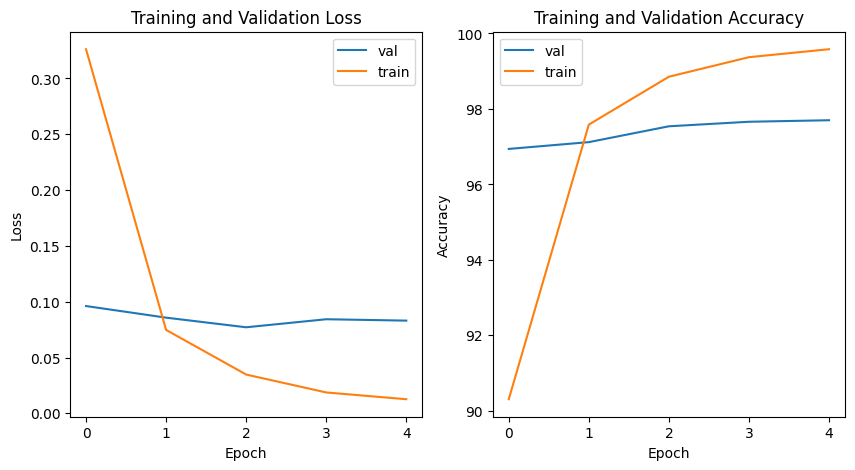

In [59]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

### CIFAR-100

In [60]:
effnet_v2_100, train_loss, val_loss, train_acc, val_acc = train(effnet_v2_100, train_loader_100, val_loader_100)

epoch 1/5, step: 250/1407: Training loss = 4.07483, Training acc = 15.62%
epoch 1/5, step: 500/1407: Training loss = 1.06728, Training acc = 75.00%
epoch 1/5, step: 750/1407: Training loss = 0.73666, Training acc = 84.38%
epoch 1/5, step: 1000/1407: Training loss = 0.80418, Training acc = 87.50%
epoch 1/5, step: 1250/1407: Training loss = 0.48465, Training acc = 84.38%

Epoch  1,                 Train: loss=1.810, accuracy=57.0%,                 Valid: loss=0.553, accuracy=83.0%

epoch 2/5, step: 250/1407: Training loss = 0.52035, Training acc = 81.25%
epoch 2/5, step: 500/1407: Training loss = 0.74707, Training acc = 78.12%
epoch 2/5, step: 750/1407: Training loss = 0.41863, Training acc = 78.12%
epoch 2/5, step: 1000/1407: Training loss = 0.40829, Training acc = 81.25%
epoch 2/5, step: 1250/1407: Training loss = 0.62278, Training acc = 84.38%

Epoch  2,                 Train: loss=0.494, accuracy=84.8%,                 Valid: loss=0.442, accuracy=86.5%

epoch 3/5, step: 250/1407: Tra

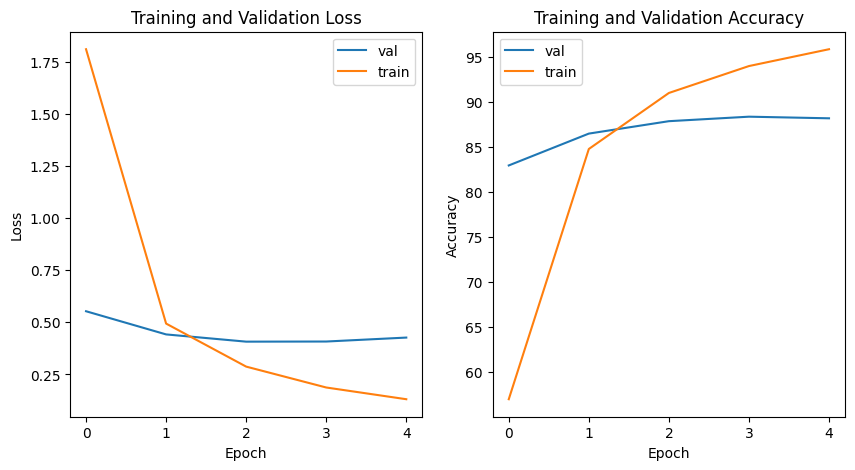

In [61]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

## EfficientNet-B0

### CIFAR-10

In [62]:
effnet_10, train_loss, val_loss, train_acc, val_acc = train(effnet_10, train_loader_10, val_loader_10)

epoch 1/5, step: 250/1407: Training loss = 0.89572, Training acc = 75.00%
epoch 1/5, step: 500/1407: Training loss = 0.49708, Training acc = 87.50%
epoch 1/5, step: 750/1407: Training loss = 0.51638, Training acc = 81.25%
epoch 1/5, step: 1000/1407: Training loss = 0.19925, Training acc = 93.75%
epoch 1/5, step: 1250/1407: Training loss = 0.21361, Training acc = 93.75%

Epoch  1,                 Train: loss=0.693, accuracy=79.5%,                 Valid: loss=0.235, accuracy=92.4%

epoch 2/5, step: 250/1407: Training loss = 0.20259, Training acc = 93.75%
epoch 2/5, step: 500/1407: Training loss = 0.22962, Training acc = 90.62%
epoch 2/5, step: 750/1407: Training loss = 0.28145, Training acc = 96.88%
epoch 2/5, step: 1000/1407: Training loss = 0.46212, Training acc = 87.50%
epoch 2/5, step: 1250/1407: Training loss = 0.20628, Training acc = 96.88%

Epoch  2,                 Train: loss=0.263, accuracy=91.3%,                 Valid: loss=0.169, accuracy=94.4%

epoch 3/5, step: 250/1407: Tra

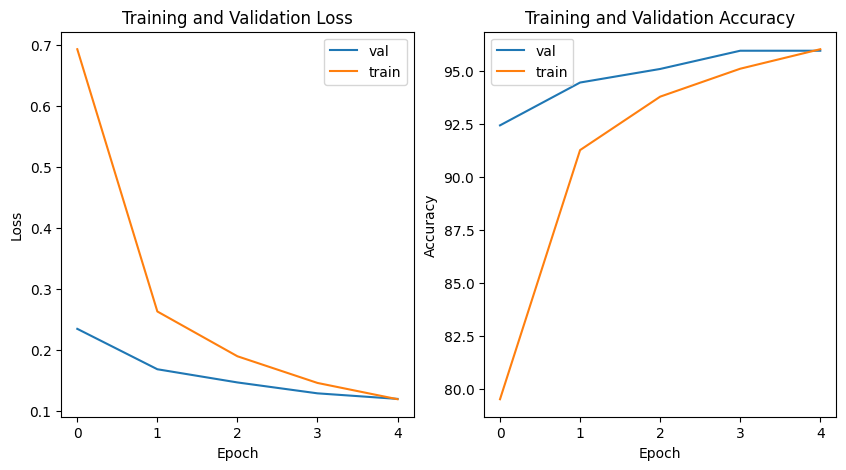

In [63]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

### CIFAR-100

In [64]:
effnet_100, train_loss, val_loss, train_acc, val_acc = train(effnet_100, train_loader_100, val_loader_100)

epoch 1/5, step: 250/1407: Training loss = 4.31672, Training acc = 6.25%
epoch 1/5, step: 500/1407: Training loss = 3.76599, Training acc = 28.12%
epoch 1/5, step: 750/1407: Training loss = 2.89110, Training acc = 43.75%
epoch 1/5, step: 1000/1407: Training loss = 2.57033, Training acc = 40.62%
epoch 1/5, step: 1250/1407: Training loss = 1.97404, Training acc = 56.25%

Epoch  1,                 Train: loss=3.167, accuracy=35.3%,                 Valid: loss=1.460, accuracy=65.2%

epoch 2/5, step: 250/1407: Training loss = 1.40057, Training acc = 68.75%
epoch 2/5, step: 500/1407: Training loss = 1.15829, Training acc = 75.00%
epoch 2/5, step: 750/1407: Training loss = 1.30313, Training acc = 65.62%
epoch 2/5, step: 1000/1407: Training loss = 0.98309, Training acc = 68.75%
epoch 2/5, step: 1250/1407: Training loss = 1.03768, Training acc = 68.75%

Epoch  2,                 Train: loss=1.284, accuracy=66.1%,                 Valid: loss=0.867, accuracy=75.4%

epoch 3/5, step: 250/1407: Trai

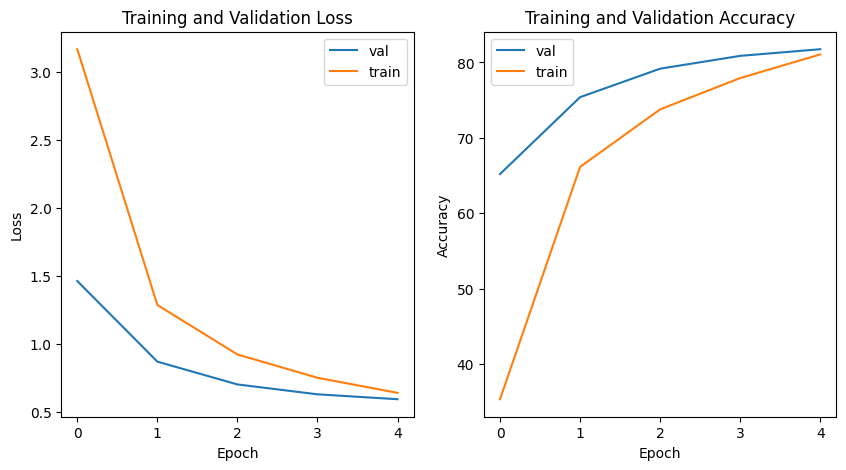

In [65]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

## ResNet-50

### CIFAR-10

In [66]:
res50_10, train_loss, val_loss, train_acc, val_acc = train(res50_10, train_loader_10, val_loader_10)

epoch 1/5, step: 250/1407: Training loss = 0.41094, Training acc = 84.38%
epoch 1/5, step: 500/1407: Training loss = 0.29952, Training acc = 90.62%
epoch 1/5, step: 750/1407: Training loss = 0.30250, Training acc = 87.50%
epoch 1/5, step: 1000/1407: Training loss = 0.20160, Training acc = 90.62%
epoch 1/5, step: 1250/1407: Training loss = 0.17961, Training acc = 93.75%

Epoch  1,                 Train: loss=0.343, accuracy=89.1%,                 Valid: loss=0.151, accuracy=94.8%

epoch 2/5, step: 250/1407: Training loss = 0.04736, Training acc = 100.00%
epoch 2/5, step: 500/1407: Training loss = 0.08704, Training acc = 93.75%
epoch 2/5, step: 750/1407: Training loss = 0.02263, Training acc = 100.00%
epoch 2/5, step: 1000/1407: Training loss = 0.10855, Training acc = 93.75%
epoch 2/5, step: 1250/1407: Training loss = 0.23952, Training acc = 90.62%

Epoch  2,                 Train: loss=0.107, accuracy=96.5%,                 Valid: loss=0.118, accuracy=96.1%

epoch 3/5, step: 250/1407: T

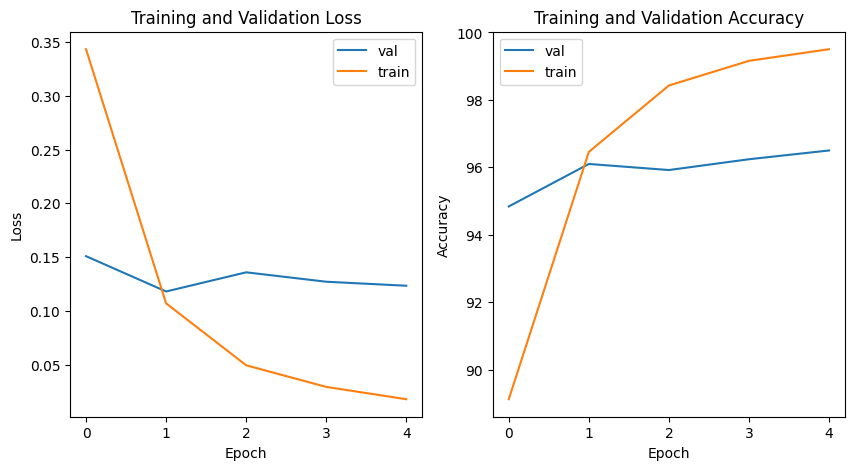

In [67]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

### CIFAR-100

In [68]:
res50_100, train_loss, val_loss, train_acc, val_acc = train(res50_100, train_loader_100, val_loader_100)

epoch 1/5, step: 250/1407: Training loss = 2.80169, Training acc = 43.75%
epoch 1/5, step: 500/1407: Training loss = 1.75396, Training acc = 56.25%
epoch 1/5, step: 750/1407: Training loss = 1.29157, Training acc = 68.75%
epoch 1/5, step: 1000/1407: Training loss = 1.04982, Training acc = 71.88%
epoch 1/5, step: 1250/1407: Training loss = 0.90263, Training acc = 68.75%

Epoch  1,                 Train: loss=1.779, accuracy=57.7%,                 Valid: loss=0.785, accuracy=76.2%

epoch 2/5, step: 250/1407: Training loss = 0.69005, Training acc = 81.25%
epoch 2/5, step: 500/1407: Training loss = 0.82285, Training acc = 75.00%
epoch 2/5, step: 750/1407: Training loss = 0.50155, Training acc = 81.25%
epoch 2/5, step: 1000/1407: Training loss = 0.48633, Training acc = 87.50%
epoch 2/5, step: 1250/1407: Training loss = 0.76864, Training acc = 75.00%

Epoch  2,                 Train: loss=0.679, accuracy=80.3%,                 Valid: loss=0.627, accuracy=80.8%

epoch 3/5, step: 250/1407: Tra

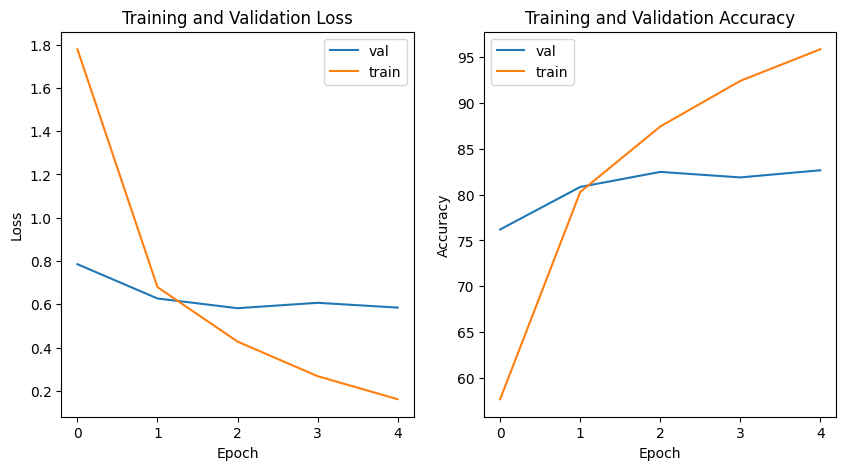

In [69]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

## Densenet-121

### CIFAR-10

In [70]:
dense121_10, train_loss, val_loss, train_acc, val_acc = train(dense121_10, train_loader_10, val_loader_10)

epoch 1/5, step: 250/1407: Training loss = 0.43499, Training acc = 75.00%
epoch 1/5, step: 500/1407: Training loss = 0.22566, Training acc = 90.62%
epoch 1/5, step: 750/1407: Training loss = 0.50070, Training acc = 87.50%
epoch 1/5, step: 1000/1407: Training loss = 0.09731, Training acc = 93.75%
epoch 1/5, step: 1250/1407: Training loss = 0.21599, Training acc = 90.62%

Epoch  1,                 Train: loss=0.358, accuracy=88.4%,                 Valid: loss=0.152, accuracy=95.1%

epoch 2/5, step: 250/1407: Training loss = 0.04944, Training acc = 96.88%
epoch 2/5, step: 500/1407: Training loss = 0.01688, Training acc = 100.00%
epoch 2/5, step: 750/1407: Training loss = 0.23655, Training acc = 90.62%
epoch 2/5, step: 1000/1407: Training loss = 0.11897, Training acc = 90.62%
epoch 2/5, step: 1250/1407: Training loss = 0.18187, Training acc = 96.88%

Epoch  2,                 Train: loss=0.120, accuracy=96.1%,                 Valid: loss=0.127, accuracy=95.9%

epoch 3/5, step: 250/1407: Tr

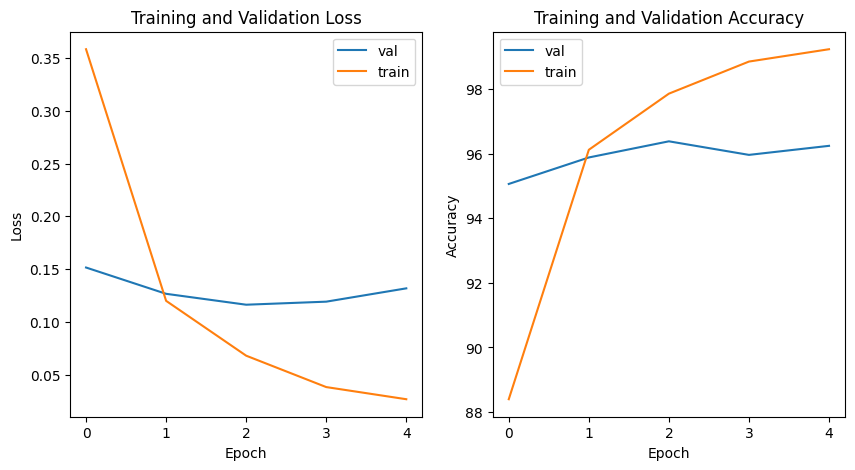

In [71]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

### CIFAR-100

In [72]:
dense121_100, train_loss, val_loss, train_acc, val_acc = train(dense121_100, train_loader_100, val_loader_100)

epoch 1/5, step: 250/1407: Training loss = 2.96241, Training acc = 25.00%
epoch 1/5, step: 500/1407: Training loss = 1.64461, Training acc = 65.62%
epoch 1/5, step: 750/1407: Training loss = 1.34423, Training acc = 68.75%
epoch 1/5, step: 1000/1407: Training loss = 1.12441, Training acc = 71.88%
epoch 1/5, step: 1250/1407: Training loss = 1.22447, Training acc = 68.75%

Epoch  1,                 Train: loss=1.879, accuracy=55.3%,                 Valid: loss=0.857, accuracy=75.2%

epoch 2/5, step: 250/1407: Training loss = 1.03805, Training acc = 75.00%
epoch 2/5, step: 500/1407: Training loss = 0.59572, Training acc = 75.00%
epoch 2/5, step: 750/1407: Training loss = 0.60054, Training acc = 87.50%
epoch 2/5, step: 1000/1407: Training loss = 1.15554, Training acc = 68.75%
epoch 2/5, step: 1250/1407: Training loss = 0.57089, Training acc = 87.50%

Epoch  2,                 Train: loss=0.769, accuracy=78.2%,                 Valid: loss=0.687, accuracy=79.5%

epoch 3/5, step: 250/1407: Tra

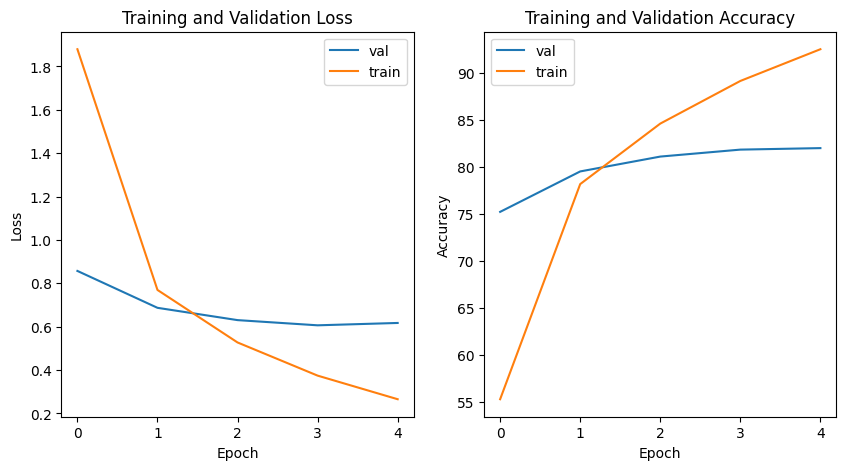

In [73]:
plot_loss_and_accuracy(train_loss, val_loss, train_acc, val_acc)

# Evaluate the models

In [74]:
def evaluate(model, test_dataloader):
  with torch.no_grad():
      number_corrects = 0
      number_samples = 0
      for i, (test_images_set , test_labels_set) in enumerate(test_dataloader):
          test_images_set = test_images_set.to(device)
          test_labels_set = test_labels_set.to(device)
      
          y_predicted = model(test_images_set)
          labels_predicted = y_predicted.argmax(axis = 1)
          number_corrects += (labels_predicted==test_labels_set).sum().item()
          number_samples += test_labels_set.size(0)
      print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

In [77]:
evaluate(vgg16_10, test_loader_10)

Overall accuracy 92.12%


In [78]:
evaluate(vgg16_100, test_loader_100)

Overall accuracy 73.72%


In [79]:
evaluate(effnet_v2_10, test_loader_10)

Overall accuracy 97.71%


In [80]:
evaluate(effnet_v2_100, test_loader_100)

Overall accuracy 87.58%


In [81]:
evaluate(effnet_10, test_loader_10)

Overall accuracy 96.1%


In [82]:
evaluate(effnet_100, test_loader_100)

Overall accuracy 81.71000000000001%


In [83]:
evaluate(res50_10, test_loader_10)

Overall accuracy 96.13000000000001%


In [84]:
evaluate(res50_100, test_loader_100)

Overall accuracy 82.3%


In [85]:
evaluate(dense121_10, test_loader_10)

Overall accuracy 96.44%


In [86]:
evaluate(dense121_100, test_loader_100)

Overall accuracy 82.08%
